# Практическая работа 6

## Илющенко Артемий Владимирович КИ23-20Б

# Задание 1 

In [61]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import seaborn as sns

In [44]:
#1
telecom_data=pd.read_csv('telecom_churn.csv')

In [45]:
#2
telecom_data.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

### Замечательно, пропусков нет

In [46]:
for column in telecom_data.select_dtypes(include=['object']).columns:
    print(telecom_data[column].value_counts())
    print()
    print('next column')
    print()

State
WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
WY     77
VA     77
CT     74
ID     73
MI     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NJ     68
NC     68
MT     68
WA     66
CO     66
NV     66
MS     65
MA     65
RI     65
AZ     64
MO     63
FL     63
NM     62
ME     62
ND     62
OK     61
NE     61
DE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64

next column

International plan
No     3010
Yes     323
Name: count, dtype: int64

next column

Voice mail plan
No     2411
Yes     922
Name: count, dtype: int64

next column



### Ну чтоже, с International plan и c Voice mail plan всё легко - onehot и выбрасывание первого столбца, но со штатами всё сложнее, onehot точно применять нельзя, тк это слишком сильно увеличит размерность данных, думаю нам всё же придётся применить label encoder

In [47]:
#3
enc=LabelEncoder()
telecom_data['State']=enc.fit_transform(telecom_data['State'])
telecom_data['Churn']=telecom_data['Churn'].astype('int64')
telecom_data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,49,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,39,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,6,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [48]:
#3
telecom_data=pd.get_dummies(telecom_data,drop_first=True)
telecom_data['International plan_Yes']=telecom_data['International plan_Yes'].astype('int64')
telecom_data['Voice mail plan_Yes']=telecom_data['Voice mail plan_Yes'].astype('int64')
telecom_data

,State,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,International plan_Yes,Voice mail plan_Yes
0,16,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,1
1,35,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,1
2,31,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,35,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1,0
4,36,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,0,1
3329,49,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,0,0
3330,39,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,0,0
3331,6,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0,1,0


In [49]:
#stan=StandardScaler()
#telecom_data=stan.fit_transform(telecom_data)

In [50]:
#Разделим данные
X=telecom_data.drop('Churn',axis=1)
Y=telecom_data.Churn

In [51]:
#4
X=(X-X.mean()/X.std())

In [52]:
def fit_model(X,Y,model,param_grid,cv=5,vebose=4):
    gd=GridSearchCV(estimator=model,param_grid=param_grid,cv=5,verbose=4)
    gd.fit(X,Y)
    return gd.best_estimator_,gd.best_score_
    
    

In [58]:
#knn
kn_model=KNeighborsClassifier()
kn_param_grid={
    'n_neighbors':[3,5,10,20],
    'weights':['uniform', 'distance']
}
#LogisticRegression
log_model=LogisticRegression()
log_param_grid={
    'penalty':['l1', 'l2', 'elasticnet', None]
    
}
#SVM
svm_model=svm.LinearSVC()
svm_param_grid={}
models=[kn_model,log_model,svm_model]
params=[kn_param_grid,log_param_grid,svm_param_grid]

#Собриаем в кучу
best_models=[fit_model(X,Y,models[i],params[i]) for i in range(len(models))]
for i in best_models:
    print()
    print(f'Лучшая модель: {i[0]} получила качество: {i[1]}')
    

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.859 total time=   0.0s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.856 total time=   0.0s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.871 total time=   0.0s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.860 total time=   0.0s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.859 total time=   0.0s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.859 total time=   0.0s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.856 total time=   0.0s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.871 total time=   0.0s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.860 total time=   0.0s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.856 total time=   0.0s
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.880 total time=   0.0s
[CV 2/5] END ....n_neighbors=5, weights=uniform;,

/usr/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimiz

[CV 5/5] END ........................penalty=l2;, score=0.863 total time=   0.0s
[CV 1/5] END ..................penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END ..................penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5] END ..................penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5] END ..................penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5] END ..................penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/5] END ......................penalty=None;, score=0.853 total time=   0.0s
[CV 2/5] END ......................penalty=None;, score=0.853 total time=   0.0s
[CV 3/5] END ......................penalty=None;, score=0.859 total time=   0.0s
[CV 4/5] END ......................penalty=None;, score=0.856 total time=   0.0s
[CV 5/5] END ......................penalty=None;, score=0.865 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., 

In [59]:
polly=PolynomialFeatures()
polly_X=polly.fit_transform(X)
best_models=[fit_model(polly_X,Y,models[i],params[i]) for i in range(len(models))]
for i in best_models:
    print()
    print(f'Лучшая модель: {i[0]} получила качество: {i[1]}')

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.861 total time=   0.0s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.853 total time=   0.0s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.870 total time=   0.0s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.866 total time=   0.0s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.856 total time=   0.0s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.861 total time=   0.0s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.853 total time=   0.0s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.868 total time=   0.0s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.866 total time=   0.0s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.853 total time=   0.0s
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.880 total time=   0.0s
[CV 2/5] END ....n_neighbors=5, weights=uniform;,

/usr/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimiz

[CV 4/5] END ........................penalty=l2;, score=0.878 total time=   0.1s
[CV 5/5] END ........................penalty=l2;, score=0.871 total time=   0.1s
[CV 1/5] END ..................penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END ..................penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5] END ..................penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5] END ..................penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5] END ..................penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/5] END ......................penalty=None;, score=0.880 total time=   0.1s
[CV 2/5] END ......................penalty=None;, score=0.862 total time=   0.1s


/usr/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimiz

[CV 3/5] END ......................penalty=None;, score=0.871 total time=   0.1s
[CV 4/5] END ......................penalty=None;, score=0.878 total time=   0.1s
[CV 5/5] END ......................penalty=None;, score=0.874 total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimiz

[CV 1/5] END ..................................., score=0.901 total time=   0.7s
[CV 2/5] END ..................................., score=0.891 total time=   1.4s
[CV 3/5] END ..................................., score=0.894 total time=   0.6s
[CV 4/5] END ..................................., score=0.907 total time=   0.9s
[CV 5/5] END ..................................., score=0.913 total time=   0.7s

Лучшая модель: KNeighborsClassifier(n_neighbors=10, weights='distance') получила качество: 0.8814889852371112

Лучшая модель: LogisticRegression(penalty=None) получила качество: 0.8730891311101207

Лучшая модель: LinearSVC() получила качество: 0.900995448221835


## Результат стал в случае использования PolynomialFeatures поднялся на 2-3%

<Axes: >

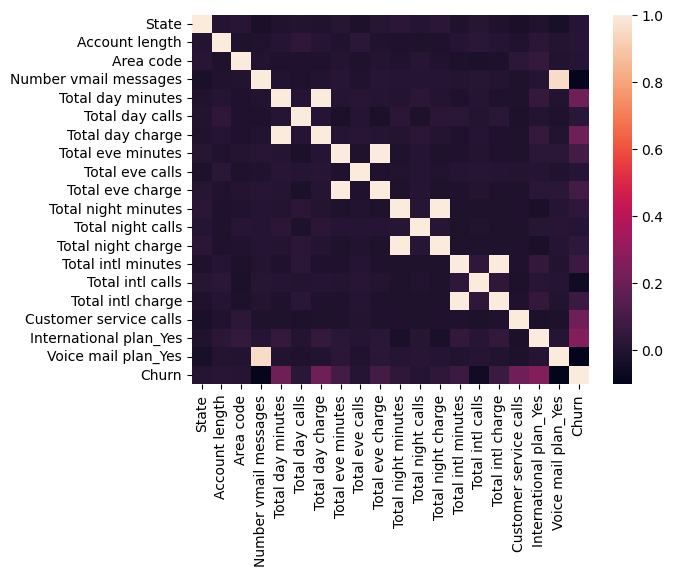

In [77]:
sns.heatmap(X.corr())

In [76]:
X['Churn']=Y
X.

,State,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,International plan_Yes,Voice mail plan_Yes,Churn
0,14.242188,125.462093,404.682108,24.408329,261.799399,104.995504,41.769333,193.436973,93.974843,12.816915,240.728144,85.884271,7.038194,6.333137,1.179985,-0.96766,-0.18804,-0.327531,0.381697,0
1,33.242188,104.462093,404.682108,25.408329,158.299399,117.995504,24.169333,191.536973,97.974843,12.656915,250.428144,97.884271,7.478194,10.033137,1.179985,0.03234,-0.18804,-0.327531,0.381697,0
2,29.242188,134.462093,404.682108,-0.591671,240.099399,108.995504,38.079333,117.236973,104.974843,6.336915,158.628144,98.884271,3.348194,8.533137,3.179985,-0.37766,-1.18804,-0.327531,-0.618303,0
3,33.242188,81.462093,397.682108,-0.591671,296.099399,65.995504,47.599333,57.936973,82.974843,1.296915,192.928144,83.884271,4.888194,2.933137,5.179985,-1.88766,0.81196,0.672469,-0.618303,0
4,34.242188,72.462093,404.682108,-0.591671,163.399399,107.995504,25.039333,144.336973,116.974843,8.646915,182.928144,115.884271,4.438194,6.433137,1.179985,-0.93766,1.81196,0.672469,-0.618303,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,1.242188,189.462093,404.682108,35.408329,152.899399,71.995504,23.249333,211.536973,120.974843,14.356915,275.128144,77.884271,8.588194,6.233137,4.179985,-0.99766,0.81196,-0.327531,0.381697,0
3329,47.242188,65.462093,404.682108,-0.591671,227.799399,51.995504,35.989333,149.436973,49.974843,9.076915,187.328144,117.884271,4.638194,5.933137,2.179985,-1.07766,1.81196,-0.327531,-0.618303,0
3330,37.242188,25.462093,499.682108,-0.591671,177.499399,103.995504,27.439333,284.836973,52.974843,20.586915,187.928144,85.884271,4.668194,10.433137,4.179985,0.14234,0.81196,-0.327531,-0.618303,0
3331,4.242188,181.462093,499.682108,-0.591671,210.499399,99.995504,33.049333,155.636973,78.974843,9.606915,135.228144,131.884271,2.288194,1.333137,8.179985,-2.31766,0.81196,0.672469,-0.618303,0
